In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
x=np.random.uniform(0,1,1000)
y=np.random.uniform(0,1,1000)

In [ ]:
df=pd.DataFrame(columns=["X","Y"])
df

,X,Y


In [ ]:
df.X=x
df.Y=y
df.head()

,X,Y
0,0.656238,0.056302
1,0.584347,0.014907
2,0.107926,0.558431
3,0.896884,0.549486
4,0.267607,0.478016


<Axes: xlabel='X', ylabel='Y'>

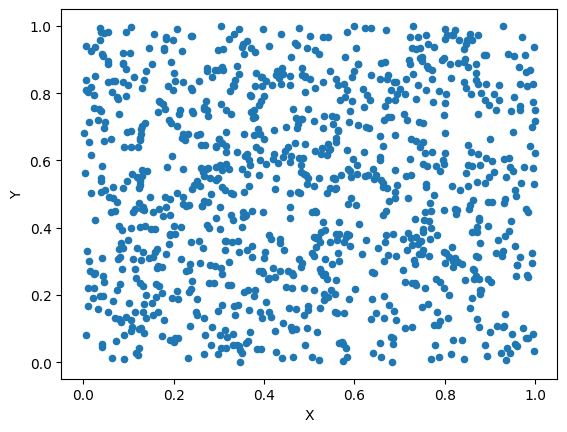

In [ ]:
df.plot(x="X",y="Y",kind="scatter")

<Axes: xlabel='X', ylabel='Y'>

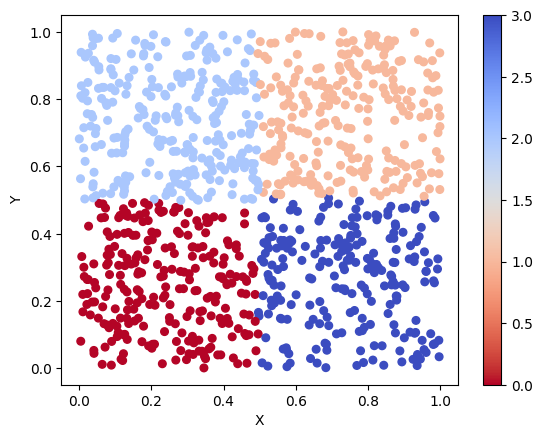

In [ ]:
model1=KMeans(n_clusters=4).fit(df)
df.plot(x="X",y="Y",c=model1.labels_,kind="scatter",s=30,cmap=plt.cm.coolwarm_r)

In [ ]:
model1.cluster_centers_

array([[0.24027409, 0.24973077],
       [0.7410884 , 0.75212485],
       [0.25943375, 0.73654918],
       [0.74224205, 0.26860644]])

In [ ]:
data=pd.read_csv("Universities.csv")
data.head(10)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
data_norm=norm_func(data.iloc[:,1:])

In [ ]:
data_norm.head(10)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [ ]:
model=KMeans(n_clusters=4).fit(data_norm)
model.inertia_   #wcss


2.377856001919789

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

WCSS=[]
for k in range(1,11):
  model=KMeans(n_clusters=k).fit(data_norm)
  WCSS.append(model.inertia_)

WCSS

[9.988235196638557,
 4.123452442397181,
 3.033332821193252,
 2.377856001919789,
 2.2138947337200996,
 1.480391973380993,
 1.2669105407356869,
 1.055034218522236,
 1.0348526024400537,
 0.9139620389884735]

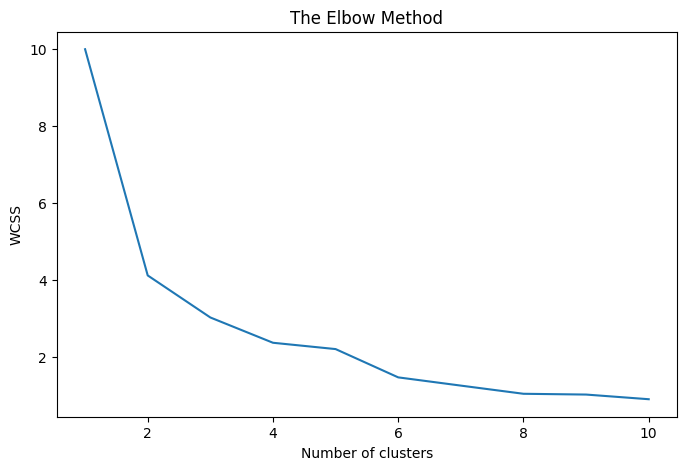

In [ ]:
fig=plt.figure(figsize=(8,5))
plt.plot(range(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
clf=KMeans(n_clusters=4)
clf.fit(data_norm)

KMeans(n_clusters=4)

In [ ]:
y_names=clf.predict(data_norm)

In [ ]:
y_names

array([2, 0, 3, 2, 3, 2, 2, 3, 2, 0, 2, 3, 3, 1, 2, 1, 2, 1, 3, 3, 3, 3,
       3, 1, 2], dtype=int32)

In [ ]:
clf.cluster_centers_

array([[0.86585366, 0.82638889, 0.26973684, 0.02631579, 0.95549562,
        0.56666667],
       [0.13780488, 0.14930556, 0.73684211, 0.69736842, 0.02276248,
        0.15833333],
       [0.84552846, 0.85339506, 0.10233918, 0.26315789, 0.45400222,
        0.89259259],
       [0.60487805, 0.69027778, 0.38815789, 0.36315789, 0.24246323,
        0.66333333]])

In [ ]:
md=pd.Series(y_names)
data_norm['clust']=md
data_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,2
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,0
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,3
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,2
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,3
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,2
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,2
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,3
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,2
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,0


<Axes: xlabel='Accept', ylabel='SFRatio'>

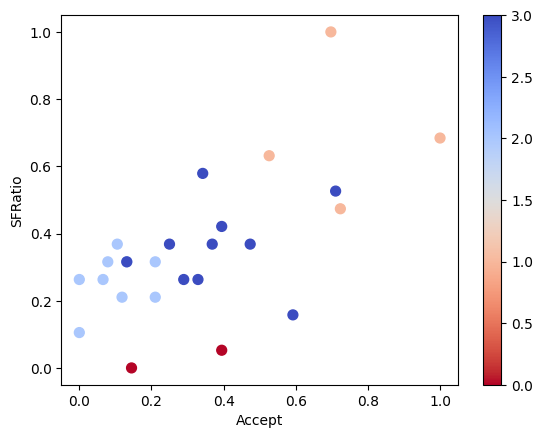

In [ ]:
data_norm.plot("Accept","SFRatio",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [ ]:
data['clust']=md
data

<Axes: xlabel='Expenses', ylabel='Top10'>

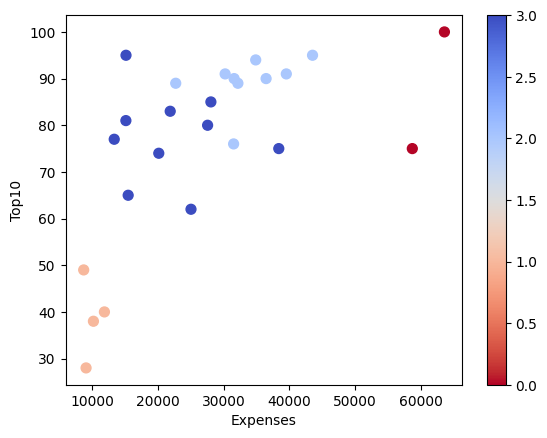

In [ ]:
data.plot("Expenses","Top10",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

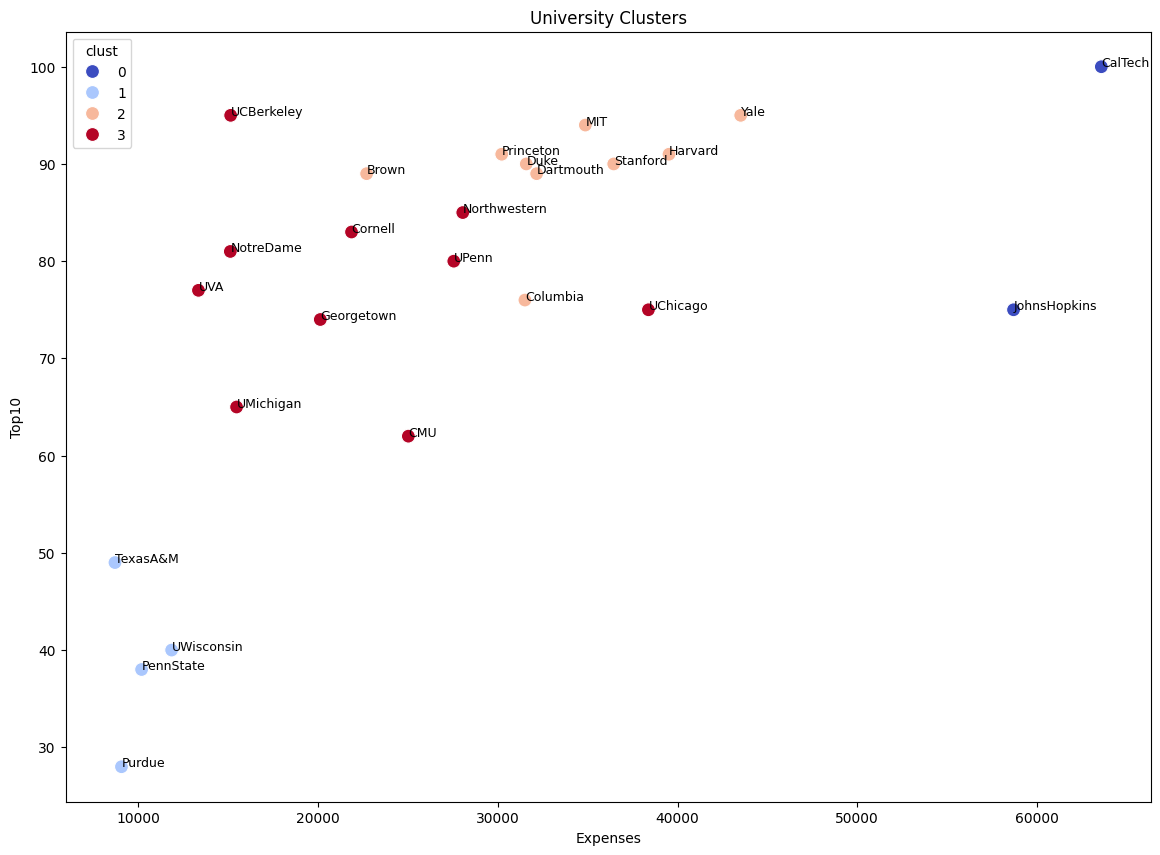

In [ ]:
# Add cluster labels to the original data
data['clust'] = y_names

# Plot using Seaborn
plt.figure(figsize=(14, 10))
sns.scatterplot(x="Expenses", y="Top10", hue="clust", data=data, palette="coolwarm", s=100)

# Add university names as text labels
for i in range(data.shape[0]):
    plt.text(data.Expenses[i], data.Top10[i], data.Univ[i], fontsize=9)

plt.title("University Clusters")
plt.xlabel("Expenses")
plt.ylabel("Top10")
plt.show()

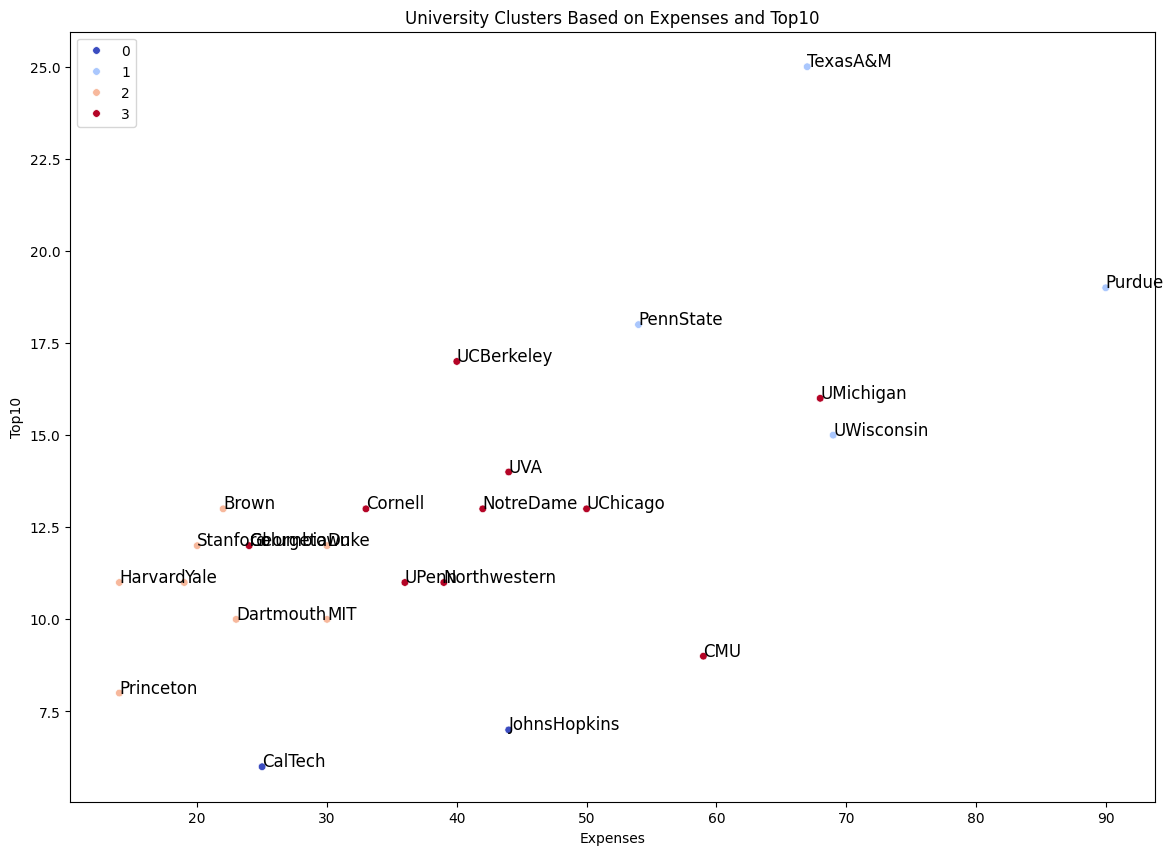

In [ ]:
# Add cluster labels to the original data
data['clust'] = y_names

# Plot using Seaborn
plt.figure(figsize=(14, 10))
sns.scatterplot(x="Accept", y="SFRatio", hue="clust", data=data, palette="coolwarm", s=30)
plt.legend(loc="upper left")

# Add university names as text labels (Optional, can be slow for many data points)
for i in range(data.shape[0]):
    plt.text(data.Accept[i], data.SFRatio[i], data.Univ[i], fontsize=12)

plt.title("University Clusters Based on Expenses and Top10")
plt.xlabel("Expenses")
plt.ylabel("Top10")
plt.show()


In [ ]:
import seaborn as sns
sns.scatterplot